In [142]:
import numpy as np
from matplotlib import pyplot
import random 

Grid = None # Maze Grid storage

DISTANCE = 16 # length of the square, go for 8-20

Rooms = [] # stores array of rooms

# Creates a grid of x squares by y squares with separators (output is x*DISTANCE + 2 by y*DISTANCE + 2)
# Also used to reset the grid to an initial point
def makeGrid(x : int = 5, y : int = 5):
    if type(x) != type(0):
        raise BaseException('Grid.makeGrid - The input "x" must be an int.')
    if type(y) != type(0):
        raise BaseException('Grid.makeGrid - The input "y" must be an int.')
    grid = []
    for i in range(y * DISTANCE + 2):
        sample = []
        for j in range(x * DISTANCE + 2):
            if i % DISTANCE == 0 or i % DISTANCE == 1 or j % DISTANCE == 0 or j % DISTANCE == 1:
                sample.append((0,0,0)) # black border/grid
            else:
                sample.append((225,225,225)) # white rest as default
        grid.append(sample)
    global Grid
    Grid = np.array(grid, dtype = 'uint8')

def getGrid():
    return Grid
def setGrid(grid):
    global Grid
    Grid = grid

# Could move the below code to another script

# Class for Rooms
class Room:
    # initializes room
    def __init__(self, x, y, width, height, color=(0, 0, 0)):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = color  
    # places generated rooms onto grid
    def place(self, grid):
        max_y, max_x = grid.shape[0], grid.shape[1]  # get grid dimensions
        for i in range(self.y * DISTANCE + 2, (self.y + self.height) * DISTANCE + 2):
            for j in range(self.x * DISTANCE + 2, (self.x + self.width) * DISTANCE + 2):
                if 0 <= i < max_y and 0 <= j < max_x:  #  ensure within bounds
                    if grid[i][j].tolist() != [0, 0, 0]:  # avoid overwriting borders
                        grid[i][j] = self.color
        return grid
    # adds rooms to array
    @staticmethod
    def addRoom(room):
        global Grid, Rooms
        Rooms.append(room)
        Grid = room.place(Grid)       

# Generate random rooms
def generateRandomRooms(count, grid_width, grid_height, max_room_size=5):
    for _ in range(count):
        width = random.randint(2, max_room_size)
        height = random.randint(2, max_room_size)
        x = random.randint(0, grid_width - width)
        y = random.randint(0, grid_height - height)
        color = (random.randint(50, 255), random.randint(50, 255), random.randint(50, 255))
        room = Room(x, y, width, height, color)
        Room.addRoom(room)

   
# Displays the grid using the specified approach, Graph or Text
def displayGrid(variant = 'Graph'):
    return variant == 'Graph' and graph() or variant == 'Text' and text() or None

# Displays the grid as an image
def graph():
    fig = pyplot.figure()
    ax = pyplot.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(Grid)
    pass

# for later, just using it to test image quality for now
def save():
    pyplot.imsave('sample.png', Grid)

def text():
    # ...
    pass

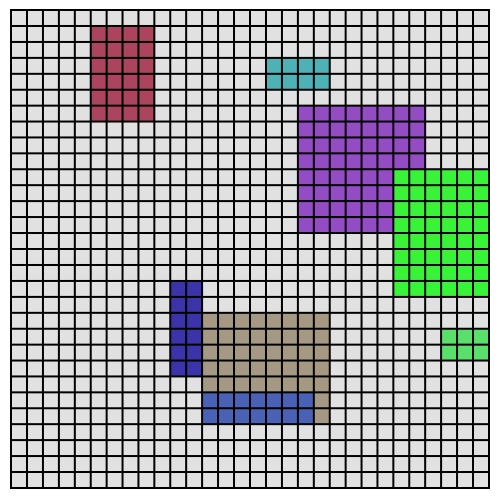

In [143]:
# Test, using ipynb to make it easier to see the results in Github without having to run it yourself.  Will probably change to .py later.
makeGrid(x = 30, y = 30)
#Test for adding a number of rooms, in a 
generateRandomRooms(count=8, grid_width=30, grid_height=30, max_room_size=8)  # 10 random rooms

displayGrid()